1] What is Boosting in Machine Learning? Explain how it improves weak learners.
- Boosting is an ensemble learning technique in machine learning that aims to convert weak learners into a strong learner. A weak learner is a model that performs only slightly better than random guessing, such as a shallow decision tree. Boosting works by training these weak learners sequentially, where each new learner focuses more on the mistakes made by the previous ones. The idea is to assign higher weights to misclassified examples, so subsequent models pay extra attention to them.

By combining the predictions of all these weak learners, boosting creates a strong final model that captures complex patterns more effectively. This sequential error-correcting process allows boosting methods like AdaBoost, Gradient Boosting, and XGBoost to achieve high accuracy and handle challenging tasks where a single model might underperform. In short, boosting improves weak learners by making them collaborate, correcting each other’s errors, and building a highly accurate ensemble.

2] What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?
- AdaBoost and Gradient Boosting are both boosting algorithms, but they differ in how they train models and update errors.

AdaBoost works by training weak learners sequentially and adjusting the weights of training samples after each round. Misclassified samples are given higher weights so that the next weak learner focuses more on them. Each learner contributes to the final model based on its accuracy, and the ensemble becomes a weighted vote of all learners.

Gradient Boosting, on the other hand, takes a more general approach by treating boosting as an optimization problem. Instead of reweighting samples, it fits each new weak learner to the residual errors (the difference between predictions and actual values) of the previous model. This way, each new learner is trained to minimize the loss function (e.g., squared error for regression, log loss for classification) using gradient descent.

3] How does regularization help in XGBoost?
- Regularization in XGBoost helps control model complexity and prevent overfitting by penalizing overly complicated trees. Unlike traditional boosting methods, XGBoost includes both L1 (Lasso) and L2 (Ridge) regularization terms in its objective function.

The L1 regularization encourages sparsity by driving some feature weights to zero, which effectively performs feature selection. The L2 regularization smooths weights and prevents them from becoming too large, reducing sensitivity to noise in the data. Together, these penalties discourage the model from fitting overly deep or complex trees that might memorize training data instead of generalizing.

As a result, regularization in XGBoost not only improves generalization but also makes the model more robust, stable, and interpretable in real-world tasks where noisy or high-dimensional features are common.

4] Why is CatBoost considered efficient for handling categorical data?
- CatBoost is considered efficient for handling categorical data because it avoids the need for heavy preprocessing like one-hot encoding, which can blow up feature space and increase computation time. Instead, it uses a technique called target-based encoding with permutations.

In this approach, CatBoost converts categorical values into numerical representations based on statistics of the target variable, such as the average label value, but does so carefully to avoid target leakage. It uses permutations of the dataset to ensure that each encoding only relies on information available before a given sample, making the transformation unbiased and robust.

This built-in handling of categorical variables allows CatBoost to work directly with raw categorical features, reducing preprocessing effort, preventing overfitting from naive encodings, and improving both training speed and predictive accuracy.

5] What are some real-world applications where boosting techniques are preferred over bagging methods?
- Boosting techniques are often preferred over bagging when the data is complex and requires capturing subtle patterns that a simple averaging approach (like bagging) might miss. For example, in fraud detection, boosting models like XGBoost and LightGBM excel because they can focus on rare but critical misclassified cases. In credit risk scoring and loan default prediction, boosting methods handle imbalanced datasets better by iteratively improving on the hardest-to-predict customers.

They are also widely used in search engine ranking and recommendation systems, where fine-grained distinctions between results matter more than broad variance reduction. In medical diagnosis and genomics, boosting captures nonlinear feature interactions that are crucial for detecting subtle disease patterns. Finally, in real-time advertising and customer churn prediction, boosting models’ ability to optimize directly on loss functions like log-loss makes them highly effective for probabilistic classification tasks.

In [1]:
'''6] Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy
'''
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.9561


In [2]:
''' 7] Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score
'''
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate using R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.4f}")


R-squared Score: 0.8004


In [3]:
''' 8] Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy
'''
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define parameter grid for learning rate tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print(f"Test Accuracy: {accuracy:.4f}")


Best Parameters: {'learning_rate': 0.1}
Test Accuracy: 0.9474


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [19:28:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9737


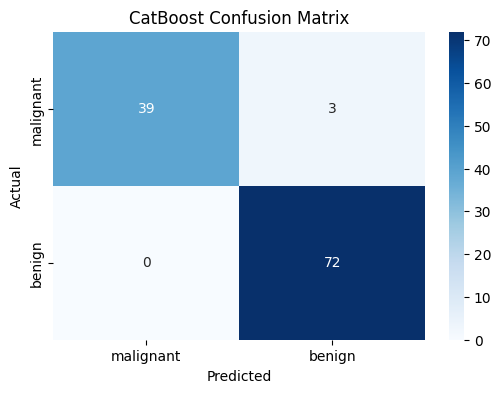

In [6]:
''' 9] Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn
'''
!pip install -q catboost

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train CatBoost Classifier (silent training)
model = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, verbose=0, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CatBoost Confusion Matrix")
plt.show()


10] You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model

- Step-by-step data science pipeline using boosting techniques:

1] Data Preprocessing & Handling Missing/Categorical Values

 - Handle missing numeric values with imputation (mean/median) and categorical values with mode or special indicators.

 - Encode categorical features: use one-hot encoding for AdaBoost/XGBoost, but with CatBoost, categorical handling is built-in.

 - Scale/normalize numeric features only if required (boosting models are usually tree-based, so not mandatory).

2] Choice of Boosting Technique

 - CatBoost is most suitable because it natively handles categorical data and missing values efficiently, reducing preprocessing overhead.

 - XGBoost could be chosen if you need more control over tuning and scalability, while AdaBoost is simpler but less effective with high-dimensional/imbalanced data.

3] Hyperparameter Tuning Strategy

 - Use GridSearchCV or RandomizedSearchCV for parameters like learning rate, max_depth, n_estimators.

 - Apply early stopping to avoid overfitting during boosting iterations.

 - Perform tuning with cross-validation (e.g., stratified k-fold) to respect the class imbalance.

4] Evaluation Metrics

 - Since the dataset is imbalanced, accuracy is not reliable. Use:

 - AUC-ROC for overall discriminative ability.

 - Precision, Recall, F1-score to ensure correct detection of defaulters.

 - Confusion matrix to check trade-offs between false positives and false negatives.

5] Business Benefit

 - The model reduces risk by identifying potential defaulters early, enabling better loan approval strategies.

 - Helps in personalized credit policies, lowering financial losses.

 - Boosts customer trust and regulatory compliance by showing data-driven decision-making.